Missing Values Ratio

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('diabetes.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7467532467532467


In [ ]:
missing_percentage = data.isnull().mean() * 100



In [ ]:
columns_to_keep = missing_percentage[missing_percentage <= 30].index
data_reduced = data[columns_to_keep]

In [ ]:
data_reduced = data_reduced.dropna()

In [ ]:
X_reduced = data_reduced.drop('Outcome', axis=1)
y_reduced = data_reduced['Outcome']

In [ ]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

In [ ]:
model_reduced = LogisticRegression(max_iter=1000)
model_reduced.fit(X_train_reduced, y_train_reduced)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_reduced = model_reduced.predict(X_test_reduced)

In [ ]:
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)
print(f"Accuracy with reduced feature set: {accuracy_reduced:.4f}")

Accuracy with reduced feature set: 0.7468


High Correlation Filter

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('diabetes.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

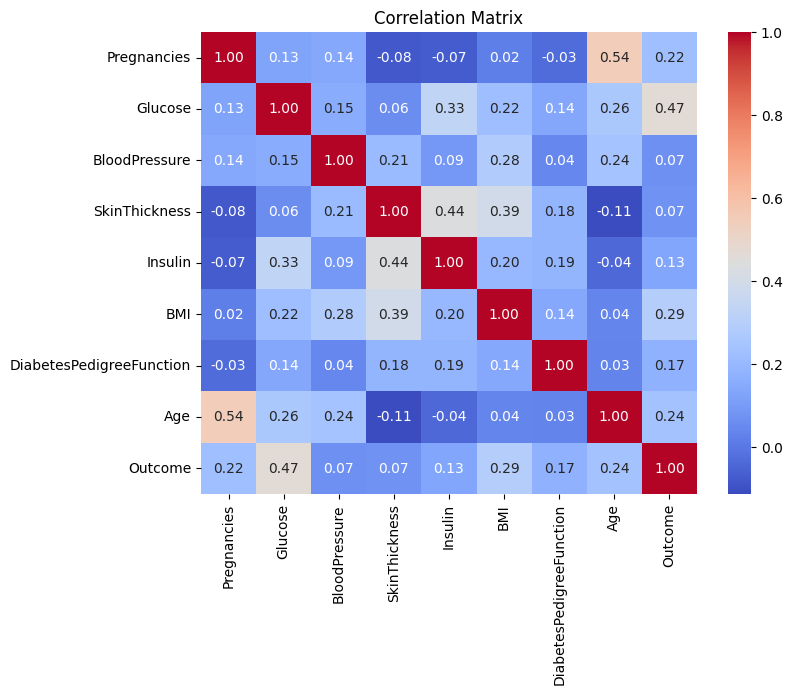

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
corr_matrix = data.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
threshold = 0.5
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
filtered_data = data.drop(columns=to_drop)

Low varience Filter

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.5)

X_filtered = filtered_data.drop('Outcome', axis=1)
selector.fit(X_filtered)

selected_features = X_filtered.columns[selector.get_support(indices=True)]

final_filtered_data = filtered_data[selected_features]

Forward Feature Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

X = final_filtered_data
y = filtered_data['Outcome']

In [ ]:
model = LogisticRegression()

In [ ]:
sfs_forward = SequentialFeatureSelector(model, direction='forward', n_features_to_select='auto', scoring='accuracy')
sfs_forward.fit(X, y)
selected_features_forward = X.columns[sfs_forward.get_support()]
forward_selected_data = X[selected_features_forward]

In [ ]:
sfs_backward = SequentialFeatureSelector(model, direction='backward', n_features_to_select='auto', scoring='accuracy')
sfs_backward.fit(X, y)
selected_features_backward = X.columns[sfs_backward.get_support()]
backward_selected_data = X[selected_features_backward]

In [ ]:
X_train_forward, X_test_forward, y_train_forward, y_test_forward = train_test_split(
    forward_selected_data, y, test_size=0.2, random_state=42
)

In [ ]:
model_forward = LogisticRegression()
model_forward.fit(X_train_forward, y_train_forward)
y_pred_forward = model_forward.predict(X_test_forward)
accuracy_forward = accuracy_score(y_test_forward, y_pred_forward)
print(f"Accuracy (Forward Selection): {accuracy_forward}")

Accuracy (Forward Selection): 0.7727272727272727


Backward Feature Elimination

In [ ]:
X_train_backward, X_test_backward, y_train_backward, y_test_backward = train_test_split(
    backward_selected_data, y, test_size=0.2, random_state=42
)

In [ ]:
model_backward = LogisticRegression()
model_backward.fit(X_train_backward, y_train_backward)
y_pred_backward = model_backward.predict(X_test_backward)
accuracy_backward = accuracy_score(y_test_backward, y_pred_backward)
print(f"Accuracy (Backward Selection): {accuracy_backward}")

Accuracy (Backward Selection): 0.7727272727272727


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_rf, y_train_rf)
y_pred_rf = model_rf.predict(X_test_rf)
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf}")

Accuracy (Random Forest): 0.7467532467532467
